# Exploratory Data Analysis for Text

Data can be found [here](https://www.kaggle.com/akudnaver/amazon-reviews-dataset).


In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator
from sklearn import utils as skl_utils
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import pandas as pd
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stopwords = set(stopwords.words('english'))

In [4]:
print(tf.__version__)
print(pd.__version__)
print(nltk.__version__)

2.8.0
1.3.4
3.6.7


In [5]:
pd.set_option('max_colwidth', None)

In [7]:
df = pd.read_excel('review-details.xlsx', engine = 'openpyxl')#, usecols= ['review_title', 'review_text', 'review_rating'])

In [13]:
df.sample(4)

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
106,2019-02-03,AMAZON,8711600533806,B00P7PLAQ6,Dove Men+Care,Personal Care,Deodorants & Fragrances,Dove Men+Care Invisible Dry Aerosol Anti-perspirant Deodorant 250ml,2019-01-04,5,...,Male Anti-Perspirant Deodorant,Male Anti-Perspirant Deodorant,NaN,NaN,NaN,Retailer Core of the Core,Core of the Core,True,0,214838a3-4ec1-e53a-6502-d2f0e60f9896
1158,2019-03-21,SUPERDRUG,8712561909778,451501,Simple,Personal Care,Skin Care,Simple x Little Mix Micellar Cleansing Wipes 25 wipes,2019-02-19,5,...,Face Wipes,Face Wipes,NaN,NaN,NaN,Retailer Core of the Core,Core of the Core,False,0,002cbf6c-f9b9-332f-632d-37c81da2bd3f
1435,2019-03-25,AMAZON,8710447336083,B07CCNVLXY,Persil,Homecare,Laundry,"Persil Powercaps Colour Washing Capsules 38 Wash, 1026g",2019-03-10,5,...,Colour Washing Capsules,Colour Washing Capsules,NaN,NaN,NaN,Retailer Core of the Core,Core of the Core,True,0,b8509a09-160e-3544-df5a-0ff6f10d196c
2086,2019-05-23,BOOTS,8712561982641,6333451,Dove,Personal Care,Skin Care,Dove DermaSpa Fair to Medium Summer Revived 200ml,2019-05-11,2,...,#10 Self-Tan,Gradual Self Tan,NaN,NaN,NaN,non-Power SKU,Core of the Core,False,0,508012ec-5d25-b6e5-5de9-11d7e71f48aa


In [14]:
df.shape

(2501, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   report_date             2501 non-null   datetime64[ns]
 1   online_store            2501 non-null   object        
 2   upc                     2501 non-null   int64         
 3   retailer_product_code   2501 non-null   object        
 4   brand                   2501 non-null   object        
 5   category                2501 non-null   object        
 6   sub_category            2501 non-null   object        
 7   product_description     2501 non-null   object        
 8   review_date             2501 non-null   datetime64[ns]
 9   review_rating           2501 non-null   int64         
 10  review_title            2403 non-null   object        
 11  review_text             2501 non-null   object        
 12  is_competitor           2501 non-null   int64   

In [11]:
df.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title                98
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i

In [19]:
len(df[df['category'] == 'Personal Care'][['review_date', 'review_rating']])

1182

In [20]:
df[df['category'] == 'Personal Care'][['review_date', 'review_rating']].value_counts()

review_date  review_rating
2019-02-19   5                46
2019-02-01   5                27
2019-02-26   5                25
2019-02-20   5                23
2019-01-26   5                22
                              ..
2019-02-25   4                 1
2019-02-21   1                 1
2019-02-20   1                 1
2019-02-19   2                 1
2019-05-24   5                 1
Length: 279, dtype: int64

In [32]:
df[df['category'] == 'Personal Care'][['review_rating']].value_counts()

review_rating
5                861
4                191
1                 44
3                 44
2                 42
dtype: int64

In [29]:
df.groupby('category')['review_rating'].count()

category
Foods             191
Homecare         1050
Personal Care    1182
Refreshment        78
Name: review_rating, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

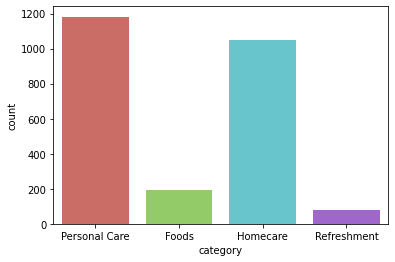

In [15]:
sns.countplot(x='category', data=df, palette='hls')

<AxesSubplot:xlabel='review_rating', ylabel='count'>

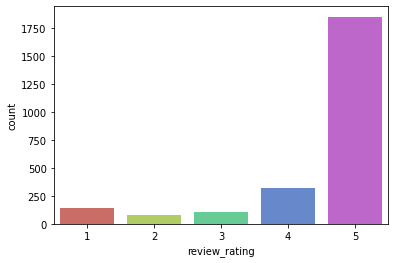

In [31]:
sns.countplot(x='review_rating', data = df, palette = 'hls')

In [33]:
df[df['category'] == 'Personal Care'][['review_rating']].value_counts(normalize=True)

review_rating
5                0.728426
4                0.161591
1                0.037225
3                0.037225
2                0.035533
dtype: float64

In [40]:
mapping = {1: 'Poor', 2: 'Not bad', 3: 'Descent', 4: 'Good', 5: 'Excellent'}

In [41]:
mapping.values()

dict_values(['Poor', 'Not bad', 'Descent', 'Good', 'Excellent'])

In [42]:
type(df['review_rating'])

pandas.core.series.Series

<AxesSubplot:xlabel='review_rating_label', ylabel='count'>

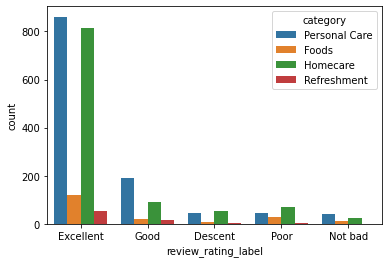

In [45]:
df['review_rating_label'] = df['review_rating'].map(mapping)

sns.countplot(x='review_rating_label', hue='category',  data= df)

In [48]:
LE = LabelEncoder()
df['relevance_enc'] = LE.fit_transform(df['review_rating'])

In [49]:
X = df.review_text #the column text contains textual data to extract features from
y = df.relevance_enc #this is the column we are learning to predict.

In [50]:
y

0       4
1       4
2       3
3       4
4       4
       ..
2496    4
2497    4
2498    0
2499    3
2500    4
Name: relevance_enc, Length: 2501, dtype: int64

In [22]:
# Code to produce a dictionary to retrieve correct tags
text_tags = df['relevance_enc'].unique()
text_tags = list(np.sort(text_tags))

In [51]:
list(np.sort(df['relevance_enc'].unique()))

[0, 1, 2, 3, 4]

In [52]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y,
    train_size=0.9,
    test_size=0.1,
    # random but same for all run
    random_state=2022,
    # keep same proportion of 'target' in test and target data
    stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr,
    train_size=0.8,
    test_size=0.2,
    # random but same for all run
    random_state=2022,
    # keep same proportion of 'target' in test and target data
    stratify=y_tr
)

In [53]:
train_texts = X_train
train_labels = y_train
test_texts = X_test
test_labels = y_test
val_texts = X_val
val_labels = y_val

In [54]:
vect = CountVectorizer(max_features=1000) #instantiate a vectorizer

X_train_dtm = vect.fit_transform(X_train)

In [55]:
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(1800, 1000) (251, 1000)


In [56]:
# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

(1800, 300) (251, 300)
Accuracy:  0.6454183266932271


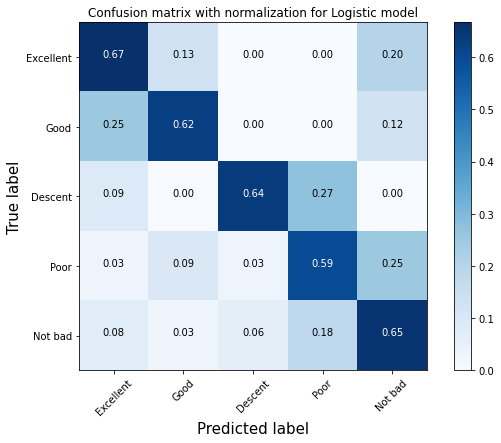

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report

vect = CountVectorizer(max_features=300) #
X_train_bow = vect.fit_transform(X_train)#
X_test_bow = vect.transform(X_test)

tfidf = TfidfTransformer()
X_train_dtm = tfidf.fit_transform(X_train_bow)#
X_test_dtm = tfidf.transform(X_test_bow)
print(X_train_dtm.shape, X_test_dtm.shape)
#i.e., the dimension of our feature vector is 7394!

logreg = LogisticRegression(class_weight="balanced", 
                            solver = 'lbfgs',
                            multi_class = 'multinomial',
                            max_iter= 100,
                            random_state=2022) #instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

#calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))

cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=list(df['review_rating_label'].unique()),normalize=True,
                      title='Confusion matrix with normalization for Logistic model')

In [61]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi